In [37]:
import numpy as np
import pandas as pd
import sklearn as sns
import matplotlib.pyplot as plt

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
movies = pd.read_csv(r"C:\Users\Acer\Desktop\alfido internship\movies rating\movies.dat", sep = '::', engine='python', encoding='latin', names=['MovieID','Title','Category'])
movies.head()

,MovieID,Title,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
movies.head()

,MovieID,Title,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [41]:
# read dataset ratings
ratings = pd.read_csv(r"C:\Users\Acer\Desktop\alfido internship\movies rating\ratings.dat", 
                      sep = '::', engine='python')
ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timedstamp']
ratings.dropna(inplace=True)

In [42]:
ratings.head()

,UserID,MovieID,Rating,Timedstamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [43]:
#Read the Users dataset
users = pd.read_csv(r"C:\Users\Acer\Desktop\alfido internship\movies rating\users.dat", sep = '::', engine='python', names=['UserID','Gender','Age','Occupation','Zip-code'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [45]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [46]:
# Merge the datasets movies, ratings and users with movieID and UserID
users = pd.merge(ratings,users, on=['UserID'])
movies = pd.merge(ratings,movies, on=['MovieID'])
df=pd.merge(users,movies, on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]
df.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,661,James and the Giant Peach (1996),1,1,F,10,3
1,914,My Fair Lady (1964),1,1,F,10,3
2,3408,Erin Brockovich (2000),1,1,F,10,4
3,2355,"Bug's Life, A (1998)",1,1,F,10,5
4,1197,"Princess Bride, The (1987)",1,1,F,10,3


In [47]:
df.dropna(axis = "index" , inplace = True)

In [48]:
df.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,661,James and the Giant Peach (1996),1,1,F,10,3
1,914,My Fair Lady (1964),1,1,F,10,3
2,3408,Erin Brockovich (2000),1,1,F,10,4
3,2355,"Bug's Life, A (1998)",1,1,F,10,5
4,1197,"Princess Bride, The (1987)",1,1,F,10,3


In [50]:
df.isnull().sum()

MovieID       0
Title         0
UserID        0
Age           0
Gender        0
Occupation    0
Rating        0
dtype: int64

In [52]:
df.shape

(1000208, 7)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000208 entries, 0 to 1000207
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000208 non-null  int64 
 1   Title       1000208 non-null  object
 2   UserID      1000208 non-null  int64 
 3   Age         1000208 non-null  int64 
 4   Gender      1000208 non-null  object
 5   Occupation  1000208 non-null  int64 
 6   Rating      1000208 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [55]:
df[df.Rating==5]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
3,2355,"Bug's Life, A (1998)",1,1,F,10,5
5,1287,Ben-Hur (1959),1,1,F,10,5
6,2804,"Christmas Story, A (1983)",1,1,F,10,5
9,595,Beauty and the Beast (1991),1,1,F,10,5
13,1035,"Sound of Music, The (1965)",1,1,F,10,5
...,...,...,...,...,...,...,...
1000193,1077,Sleeper (1973),6040,25,M,6,5
1000198,2022,"Last Temptation of Christ, The (1988)",6040,25,M,6,5
1000199,2028,Saving Private Ryan (1998),6040,25,M,6,5
1000204,1094,"Crying Game, The (1992)",6040,25,M,6,5


In [59]:
#to find rating =5 and age <30
df[(df.Rating==5) & (df.Age<30)]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
3,2355,"Bug's Life, A (1998)",1,1,F,10,5
5,1287,Ben-Hur (1959),1,1,F,10,5
6,2804,"Christmas Story, A (1983)",1,1,F,10,5
9,595,Beauty and the Beast (1991),1,1,F,10,5
13,1035,"Sound of Music, The (1965)",1,1,F,10,5
...,...,...,...,...,...,...,...
1000193,1077,Sleeper (1973),6040,25,M,6,5
1000198,2022,"Last Temptation of Christ, The (1988)",6040,25,M,6,5
1000199,2028,Saving Private Ryan (1998),6040,25,M,6,5
1000204,1094,"Crying Game, The (1992)",6040,25,M,6,5


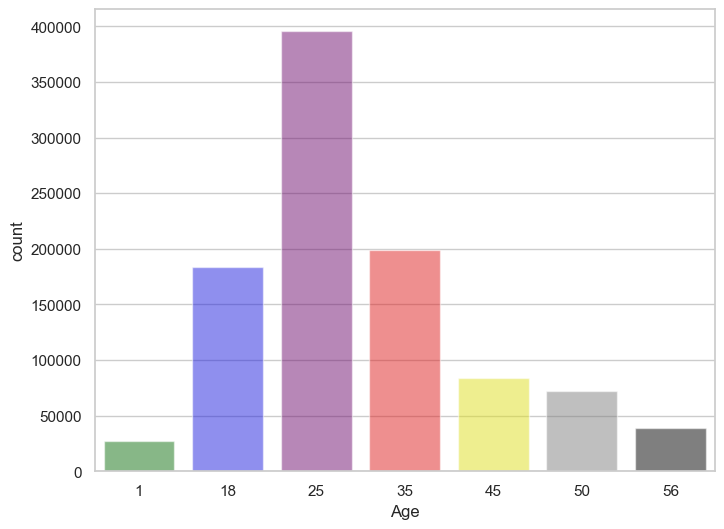

In [60]:
#to get a plot for diffrent age groups og people and its count range
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plotting the age distribution
sns.countplot(x='Age', data=df, palette=['green', 'blue', 'purple', 'red', 'yellow', 'grey', 'black'], alpha=0.5)

plt.show()

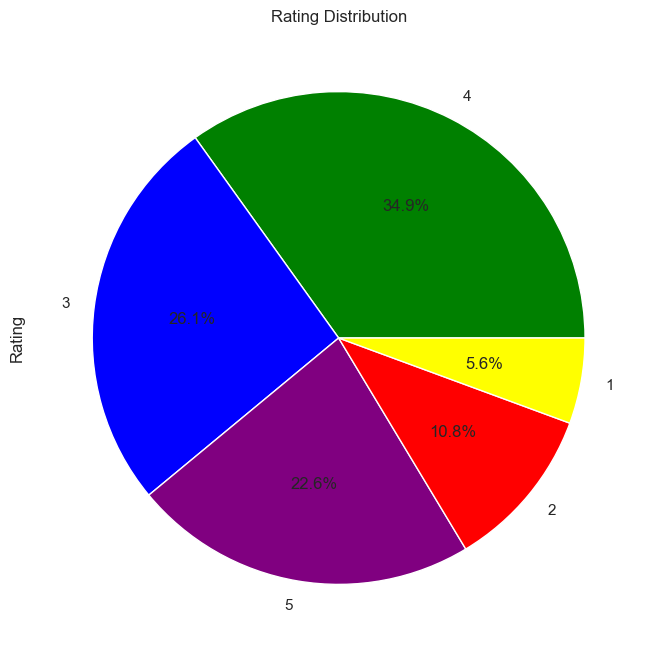

In [61]:
plt.figure(figsize=(8, 8))

# Plotting the pie chart for rating distribution
df['Rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue', 'purple', 'red', 'yellow', 'grey', 'black'])

# Adding a title
plt.title('Rating Distribution')

plt.show()

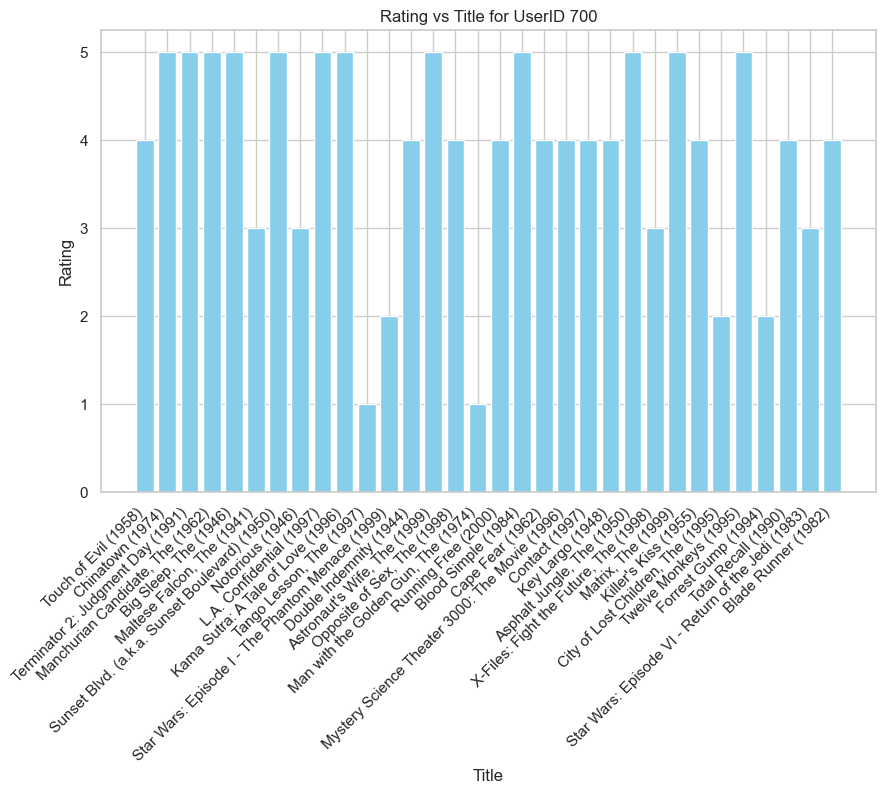

In [63]:
data = df[df.UserID == 700]

plt.figure(figsize=(10, 6))

# Plotting a bar plot for Rating and Title
plt.bar(data['Title'], data['Rating'], color='skyblue')

# Adding labels and title
plt.xlabel('Title')
plt.ylabel('Rating')
plt.title('Rating vs Title for UserID 700')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

In [64]:
df.corr()

,MovieID,UserID,Age,Occupation,Rating
MovieID,1.000000,-0.017740,0.027573,0.008585,-0.064041
UserID,-0.017740,1.000000,0.034684,-0.026697,0.012305
Age,0.027573,0.034684,1.000000,0.078372,0.056872
Occupation,0.008585,-0.026697,0.078372,1.000000,0.006753
Rating,-0.064041,0.012305,0.056872,0.006753,1.000000


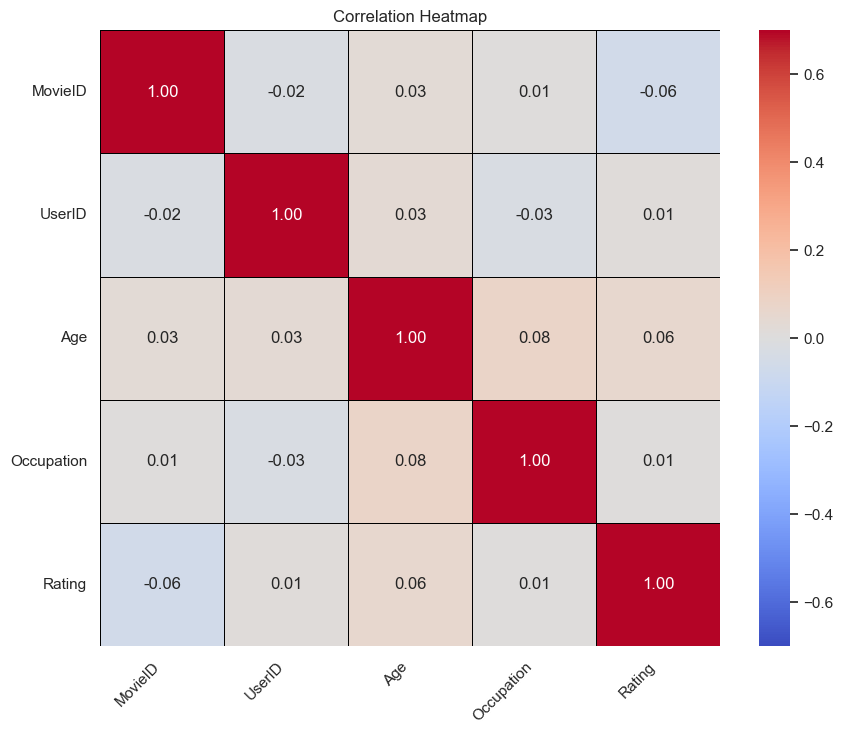

In [65]:
plt.figure(figsize=(10, 8))

# Creating a heatmap to check the correlation between variables
heatmap = sns.heatmap(df.corr(), cmap='coolwarm', vmax=0.7, vmin=-0.7, annot=True, fmt='.2f', linewidths=0.5, linecolor='black')

# Adding a title
plt.title('Correlation Heatmap')

# Rotating x and y-axis labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

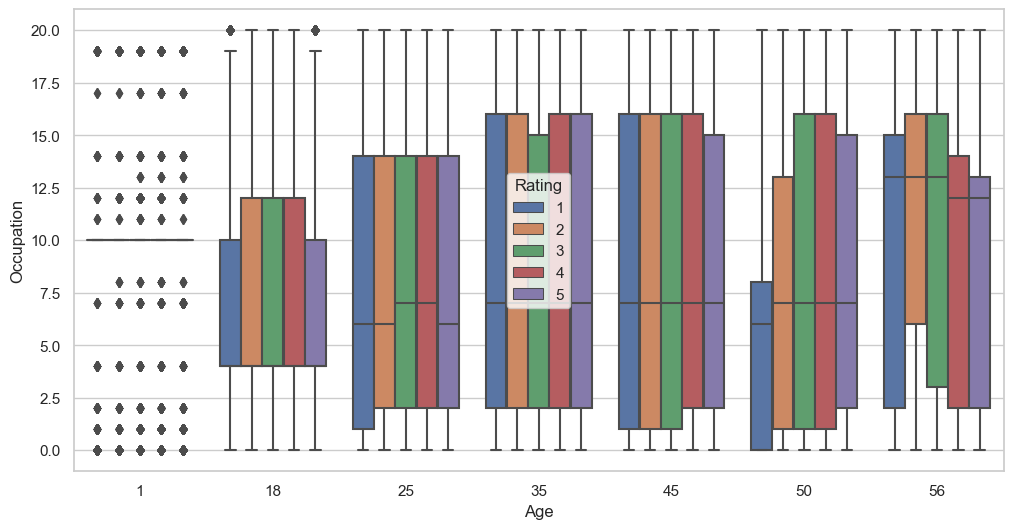

In [67]:
# Plot Bloxplot for outliers
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Age', y = 'Occupation', hue = 'Rating', data = df)
plt.show()

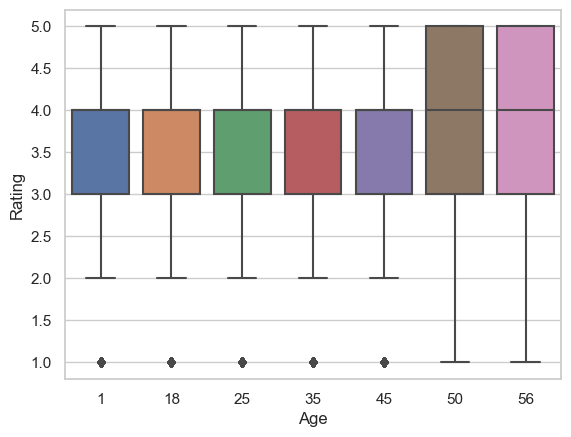

In [68]:
sns.boxplot(x = 'Age', y = 'Rating', data = df)
plt.show()

In [69]:
f_500 = df[500:]
f_500.dropna(inplace=True)

In [70]:
X = f_500[['MovieID', 'Age', 'Occupation']].values

In [71]:
y= f_500[['Rating']].values

In [73]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
log_score = round(logreg.score(X_train, y_train) * 100, 2)
log_score

34.89

In [76]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_score

56.56

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score

44.96

In [79]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
gaussian_score = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_score

34.93

Movie Rating Prediction, the initial phase involved meticulous 
data cleaning facilitated by Exploratory Data Analysis (EDA). Subsequently
, a diverse set of visualizations, including Pie charts for age groups, 
Scatter plots, Bar plots, and Box plots, were employed to gain deeper insights into the dataset.

Analyzing the Heatmap yielded crucial findings:

Negative values indicated very weak correlations, exemplified by the limited association 
between movieId and rating, as well as UserId and occupation.
Positive values, on the other hand, hinted at some weak positive correlations, 
notably observed in the relationship between Age and Occupation.
Transitioning to predictive modeling, several algorithms were applied to forecast 
movie ratings:

Logistic Regression achieved a score of 34.69%, indicating its predictive capability 
in the context of the dataset.
Decision Tree, with a commendable score of 56.56%, demonstrated robust performance
in capturing intricate patterns within the data.
KNeighborsClassifier (KNN) exhibited a score of 44.96%, showcasing its ability to 
classify movie ratings based on neighboring data points.
Gaussian Naive Bayes, with a score of 34.93%, employed probabilistic assumptions to make predictions, 
contributing to the diverse set of algorithms explored.
In essence, this comprehensive approach encompassed data cleaning, exploratory visualization, 
and the application of various predictive algorithms. The findings not only 
unveiled patterns within the dataset but also provided a quantitative assessment of the 
performance of each algorithm in the task of predicting movie ratings.